# **Libraries Import**

### **Data Analysis**

In [2]:
import pandas as pd

### **Calculus**

In [3]:
import numpy as np

### **Data Visualization**

In [4]:
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

### **Data Splitting**

In [5]:
from sklearn.model_selection import train_test_split

### **Grid Search & Halving Grid Search**

In [6]:
#Grid Search:
from sklearn.model_selection import GridSearchCV

#Halving Grid Search:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
#It makes the training process way faster, but lower a little bit the efficiency.
#But the models are still pretty accurates.

### **Scikit-Learn Models**

In [7]:
#Linear Regression:
from sklearn.linear_model import LinearRegression

#Logistic Regression:
from sklearn.linear_model import LogisticRegression

#Linear Discriminant Analysis:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Linear Classifiers with Stochastic Gradient Descent training:
from sklearn.linear_model import SGDClassifier

#Linear Support Vector Classifier:
from sklearn.svm import LinearSVC

#Gaussian Naive Bayes Classifier:
from sklearn.naive_bayes import GaussianNB

#Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier

#Support Vector Machine:
from sklearn.svm import SVR

#K-Nearest Neighbors Classifier:
from sklearn.neighbors import KNeighborsClassifier

#Multi-Layer Perceptron Classifier:
from sklearn.neural_network import MLPClassifier

# **Data Import**

### **Import**

Loading data with adding columns names (which were not in the .data file):

In [ ]:
data =  pd.read_csv('page-blocks.data', sep="\s+", header=None)
data.columns = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans', 'type']

### **Description**

In [ ]:
data

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,type
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1


Description of the columns given with the dataset:

      height:   integer.     | Height of the block.
      length:   integer.     | Length of the block.
      area:     integer.     | Area of the block (height * lenght);
      eccen:    continuous.  | Eccentricity of the block (lenght / height);
      p_black:  continuous.  | Percentage of black pixels within the block (blackpix / area);
      p_and:    continuous.  | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);
      mean_tr:  continuous.  | Mean number of white-black transitions (blackpix / wb_trans);
      blackpix: integer.     | Total number of black pixels in the original bitmap of the block.
      blackand: integer.     | Total number of black pixels in the bitmap of the block after the RLSA.
      wb_trans: integer.     | Number of white-black transitions in the original bitmap of the block.
      type: integer.         | Type of the block.       

Number of instances: 5473

Summary statistics:

In [ ]:
data.describe()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,type
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


# **Data Cleaning**

### **Checking if there is missing data**

In [ ]:
data.isna().sum()

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
type        0
dtype: int64

There's no missing data, which corresponds to what the description given with the dataset says.

### **Checking if all columns are the correct types**

In [ ]:
data.dtypes

height        int64
length        int64
area          int64
eccen       float64
p_black     float64
p_and       float64
mean_tr     float64
blackpix      int64
blackand      int64
wb_trans      int64
type          int64
dtype: object

All columns are numerical, which corresponds to what the description given with the dataset says.

# **Data Visualization**

### **Piechart of all 5 different classes**

In [ ]:
series = data['type'].value_counts()
series

df_result = pd.DataFrame(series)
df_result = df_result.reset_index()  
df_result.columns = ['Type', 'Total']

fig = px.pie(df_result,
             values='Total',
             names='Type', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.85
))
fig.show()
#The piechart doesn't appear when the notebook is converted to html, so here's a screenshot:

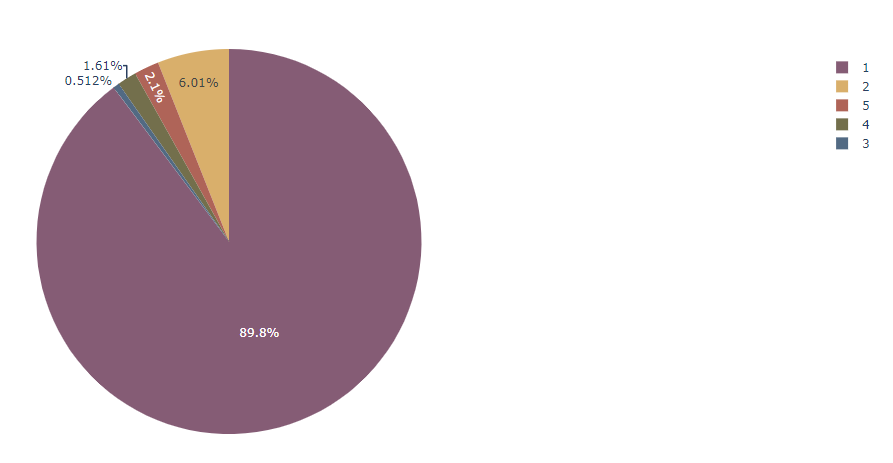

### **Boxplots of all variables by class**

##### **Without the logarithmic scale**

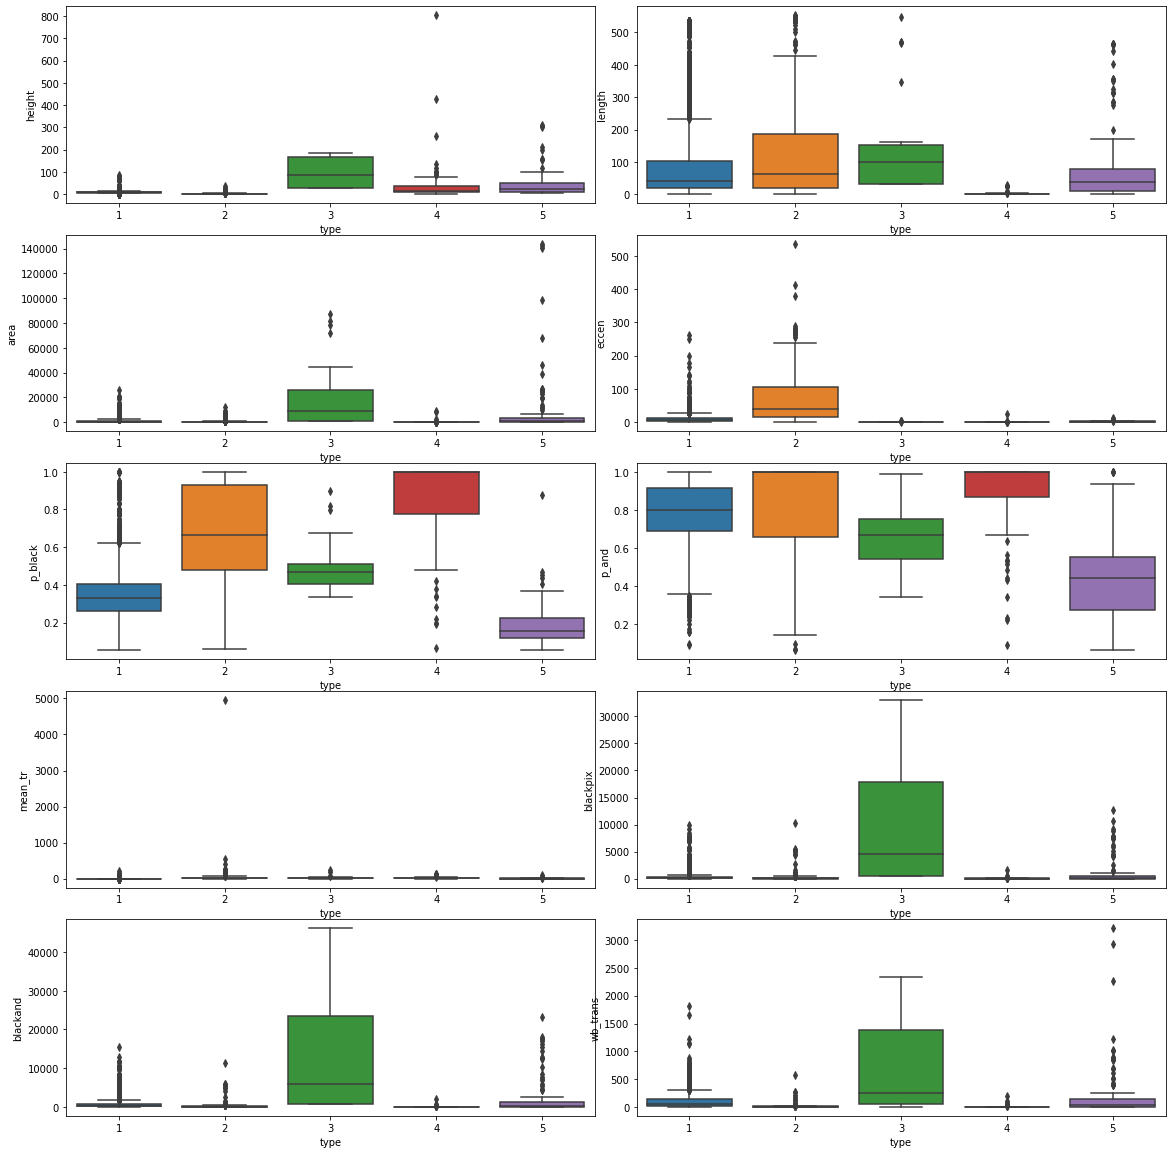

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(16,16))
plt.tight_layout()
k=0
for i in range(5):
    for j in range(2):
        a=sns.boxplot(ax=axes[i, j], data=data, x="type",y=data.columns[k])
        #a.set_yscale('log')
        k+=1

##### **With the logarithmic scale**

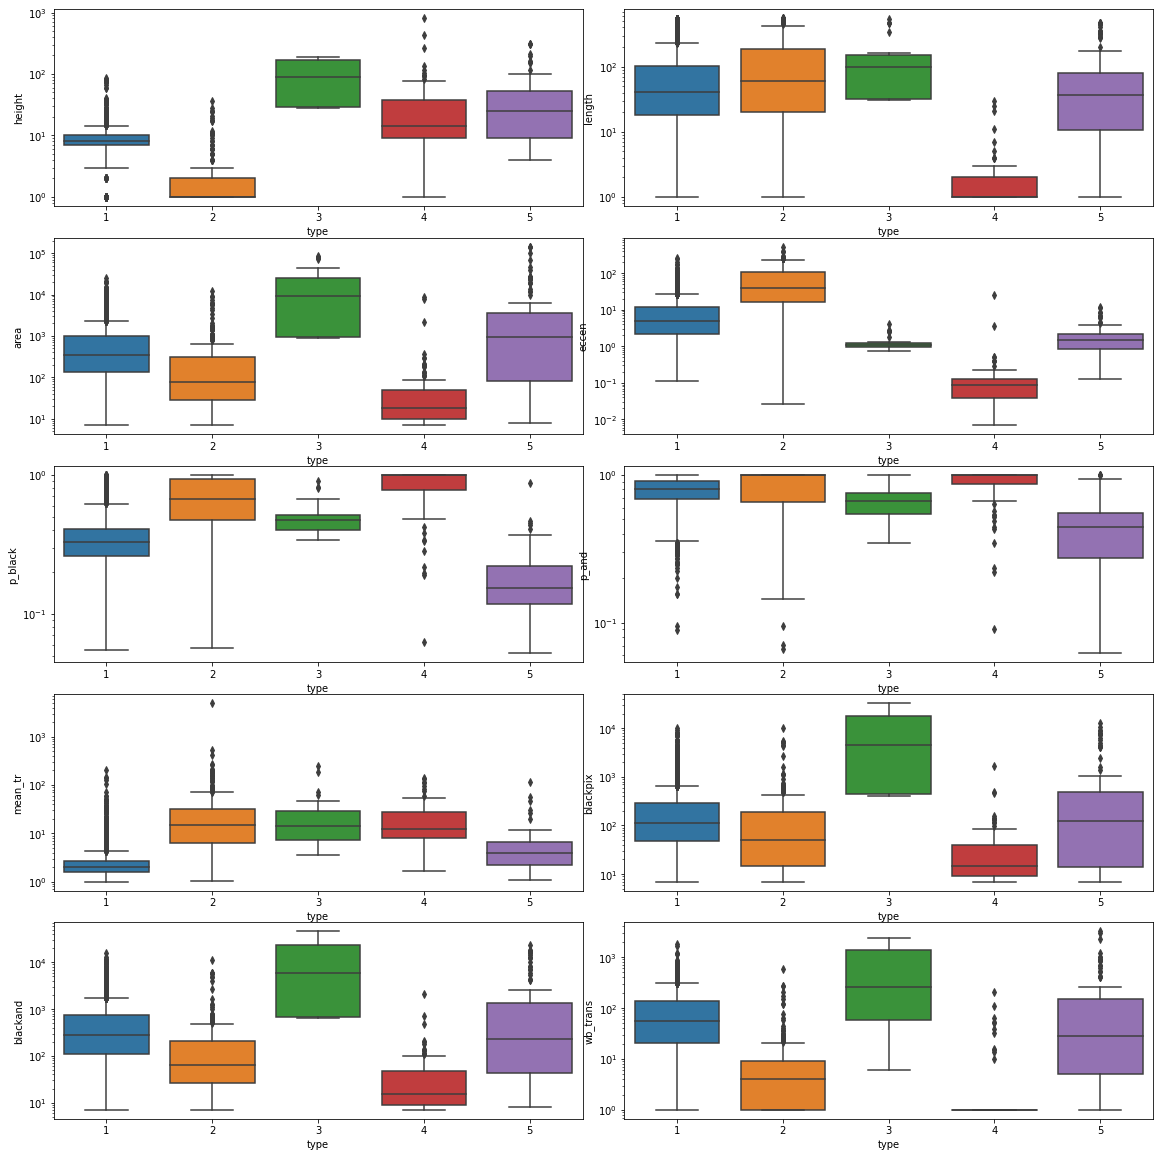

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(16,16))
plt.tight_layout()
k=0
for i in range(5):
    for j in range(2):
        a=sns.boxplot(ax=axes[i, j], data=data, x="type",y=data.columns[k])
        a.set_yscale('log')
        k+=1

### **Scatterplots of the 3 most explanatory variables according to the number of black pixels**

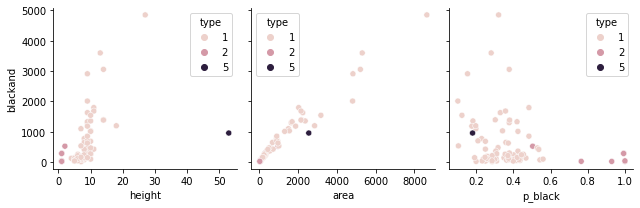

In [ ]:
data1=data.sample(frac=0.015)
x_vars = ['height', 'area','p_black']
y_var = 'blackand'

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=3, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=data1, x=x_var, y=y_var, ax=ax, hue='type')
g.tight_layout()

### **Scatterplot of the number of black pixels with the distribution area by class**

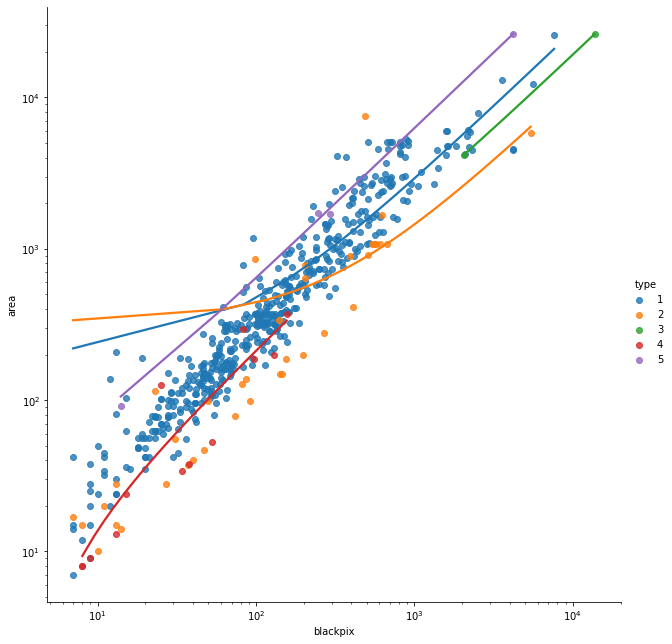

In [ ]:
data1=data.sample(frac=0.1)
grid=sns.lmplot(x="blackpix", y="area", data=data1, hue='type' ,ci=None, height=9)
grid.set(xscale="log", yscale="log")

### **Scatterplot of the height according to the length by class**

[None, None]

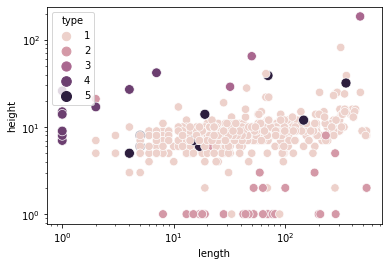

In [ ]:
data1=data.sample(frac=0.1)
grid=sns.scatterplot(x="length", y='height', data=data1, hue='type', size='type', sizes=(70,100))
grid.set(xscale='log',yscale='log')

### **Scatterplot of the number of black pixels according to the number of white/black transitions**

[None, None]

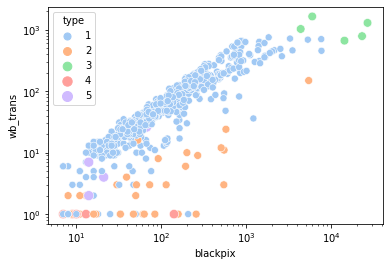

In [ ]:
data1=data.sample(frac=0.1)
grid = sns.scatterplot(x="blackpix", y="wb_trans", data=data1, palette='pastel', hue = 'type', size = 'type',
                    sizes=(50, 100))
grid.set(xscale="log", yscale="log")

# **Trainset & Testset**

In [ ]:
X = data[['height','length','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']].to_numpy()
X

array([[  5.,   7.,  35., ...,  14.,  23.,   6.],
       [  6.,   7.,  42., ...,  18.,  37.,   5.],
       [  6.,  18., 108., ...,  31.,  80.,   7.],
       ...,
       [  6.,  95., 570., ..., 171., 519., 104.],
       [  7.,  41., 287., ...,  61., 230.,  45.],
       [  8.,   1.,   8., ...,   8.,   8.,   1.]])

In [ ]:
y = data['type'].to_numpy()
y

array([1, 1, 1, ..., 1, 1, 4])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4378, 10)
(1095, 10)
(4378,)
(1095,)


# **Machine Learning**

### **Linear Regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Training time: 0.218s

In [ ]:
regressor.score(X_test,y_test)

0.30861531316590607

### **Logistic Regression**

In [ ]:
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

Training time: 0.955s

In [ ]:
regressor.score(X_test,y_test)

0.947945205479452

### **Linear Discriminant Analysis**

In [ ]:
param_grid = {'solver':['svd','lsqr','eigen']}
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid)
model = grid.fit(X_train,y_train)

Training time: 0.527s

In [ ]:
grid.best_estimator_

LinearDiscriminantAnalysis()

In [ ]:
grid.best_score_

0.9428986301369863

In [ ]:
grid.best_params_

{'solver': 'svd'}

In [ ]:
grid.score(X_test,y_test)

0.9525114155251142

### **Linear Classifiers with Stochastic Gradient Descent training**

In [ ]:
param_grid = {'loss':['hinge','log','modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
              'penalty':['l2','l1','elasticnet'],
              'max_iter':[2000]}
grid = GridSearchCV(SGDClassifier(), param_grid)
model = grid.fit(X_train,y_train)

Training time: 14.37s

In [ ]:
grid.best_estimator_

SGDClassifier(loss='squared_hinge', max_iter=2000, penalty='l1')

In [ ]:
grid.best_score_

0.9358129158512719

In [ ]:
grid.best_params_

{'loss': 'squared_hinge', 'max_iter': 2000, 'penalty': 'l1'}

In [ ]:
grid.score(X_test,y_test)

0.9351598173515981

### **Linear Support Vector Classifier**

In [ ]:
param_grid = {'penalty':['l2','l1'],
              'loss':['squared_hinge'],
              'dual':[False],
              'max_iter':[2000]}
grid = HalvingGridSearchCV(LinearSVC(), param_grid)
model = grid.fit(X_train,y_train)

Training time: 8.12s

In [ ]:
grid.best_estimator_

LinearSVC(dual=False, max_iter=2000)

In [ ]:
grid.best_score_

0.9559167645140247

In [ ]:
grid.best_params_

{'dual': False, 'loss': 'squared_hinge', 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
grid.score(X_test,y_test)

0.958904109589041

### **Gaussian Naive Bayes Classifier**

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Training time: 0.22s

In [ ]:
model.score(X_test,y_test)

0.9095890410958904

### **Decision Tree Classifier**

In [ ]:
param_grid = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':np.arange(3,5),
              'min_samples_split':np.arange(2,4),
              'min_samples_leaf':np.arange(3,5),
              'max_features':['auto','sqrt','log2']}
grid = HalvingGridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
model = grid.fit(X_train,y_train)

Training time: 1.562s

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=4,
                       min_samples_split=3)

In [ ]:
grid.best_score_

0.9526634847989538

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
grid.score(X_test,y_test)

0.9598173515981735

### **Random Forest Classifier**

In [ ]:
param_grid = {'n_estimators':np.arange(70,100,10),
              'criterion':['gini','entropy'],
              'max_depth':np.arange(3,5),
              'min_samples_split':np.arange(2,4),
              'min_samples_leaf':np.arange(3,5),
              'max_features':['sqrt','log2',None],
              'bootstrap':[True,False]}
grid = HalvingGridSearchCV(RandomForestClassifier(), param_grid, factor = 3)
model = grid.fit(X_train,y_train)

Training time: 264.758s

In [ ]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=80)

In [ ]:
grid.best_score_

0.9654162279296189

In [ ]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 80}

In [ ]:
grid.score(X_test,y_test)

0.9698630136986301

### **Support Vector Machine**

In [ ]:
#A lot of models couldn't run on my computer without errors.
#So the machine learning models ran on Google Colab.
#But the session is timed and it constantly stops before the Support Vector Machine ends its training.
#So here is the code, but unfortunately we do not have any results.

In [ ]:
param_grid = {'kernel':['linear','poly','rbf','sigmoid'],
              'degree':np.arange(3,4),
              'gamma':['scale','auto']}
grid = HalvingGridSearchCV(SVR(), param_grid, factor = 3)
model = grid.fit(X_train,y_train)

Training time: 

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_test,y_test)

### **K-Nearest Neighbors**

In [ ]:
param_grid = {'n_neighbors':np.arange(3,11,2),
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':np.arange(25,35),
              'p':[1,2]}
grid = HalvingGridSearchCV(KNeighborsClassifier(), param_grid, factor = 3)
model = grid.fit(X_train,y_train)

Training time: 22.45s

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=29, n_neighbors=3, p=1)

In [ ]:
grid.best_score_

0.9577579392330113

In [ ]:
grid.best_params_

{'algorithm': 'brute',
 'leaf_size': 29,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
grid.score(X_test,y_test)

0.9616438356164384

### **Comparison**

In [19]:
models = ["Linear Regression","Logistic Regression","Linear Discriminant Analysis",
          "Linear Classifiers with SGD","Linear Support Vector Classifier",
          "gaussian Naive Bayes","Decision Tree Classifier","Random Forest Classifier",
          "K-Nearest Neighbors"]
test_scores = [30.9,94.8,95.3,93.5,95.9,91.0,96.0,97.0,96.2]
training_times = [0.218,0.955,0.527,14.37,8.12,0.22,1.562,264.758,22.45]
colors = ["red","darkgreen","darkgreen","blue","forestgreen","blue","forestgreen","limegreen","forestgreen"]

<BarContainer object of 9 artists>

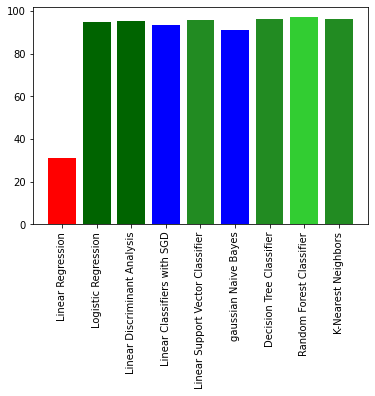

In [20]:
plt.xticks(rotation='vertical')
plt.bar(x = models,
        height = test_scores,
        color = colors)

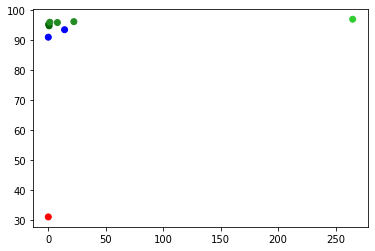

In [21]:
plt.scatter(x = training_times,
            y = test_scores,
            c= colors)

As the last graph is difficult to read, we get rid of the extremes:

In [24]:
models = ["Logistic Regression","Linear Discriminant Analysis",
          "Linear Classifiers with SGD","Linear Support Vector Classifier",
          "gaussian Naive Bayes","Decision Tree Classifier",
          "K-Nearest Neighbors"]
test_scores = [94.8,95.3,93.5,95.9,91.0,96.0,96.2]
training_times = [0.955,0.527,14.37,8.12,0.22,1.562,22.45]
colors = ["darkgreen","darkgreen","blue","forestgreen","blue","forestgreen","forestgreen"]

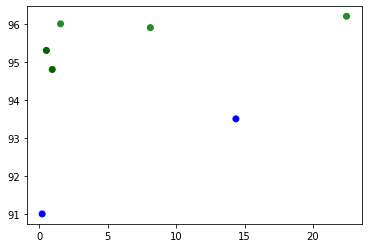

In [25]:
plt.scatter(x = training_times,
            y = test_scores,
            c= colors)

### **Our choice**

Based on the performances (training time, training score and testing score), if you want to make predictions with this dataset, we recommand you to use a Decision Tree Classifier with the following parameters:
  - 'criterion' : 'gini';
  - 'max_depth' : 4;
  - 'max_features' : 'log2';
  - 'min_samples_leaf' : 4;
  - 'min_samples_split' : 3;
  - 'splitter' : 'best'.

For a quick reminder, here are its performances:
  - training time : 1.562s;
  - training score : 95.3%;
  - testing score : 96.0%.

# **Deep Learning**

Here's one simple deep learning model to complement the previous machine learning models.

### **Multi-Layer Perceptron Classifier**

In [ ]:
param_grid = {'hidden_layer_sizes':[(20,10),(30,15),],
              'activation':['identity','logistic','tanh','relu'],
              'solver':['lbfgs','sgd','adam'],
              'max_iter':[1000],
              'learning_rate':['constant','invscaling','adaptive']}
grid = HalvingGridSearchCV(MLPClassifier(), param_grid, factor = 3)
model = grid.fit(X_train,y_train)

Training time: 666.818s

In [ ]:
grid.best_score_

0.965013926119647

In [ ]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (30, 15),
 'learning_rate': 'invscaling',
 'max_iter': 1000,
 'solver': 'adam'}

In [ ]:
grid.score(X_test,y_test)

0.9689497716894977

# **Source**

### **Owner**

**Donato Malerba**

Dipartimento di Informatica

University of Bari

via Orabona 4

70126 Bari - Italy

phone: +39 - 80 - 5443269

fax: +39 - 80 - 5443196

malerbad '@' vm.csata.it

### **Link**

https://archive.ics.uci.edu/ml/datasets/Page+Blocks+Classification

### **Relevant papers that use this dataset**

  - **Malerba, D., Esposito, F., and Semeraro, G. "A Further Comparison of Simplification Methods for Decision-Tree Induction." In D. Fisher and H. Lenz (Eds.), "Learning from Data: Artificial Intelligence and Statistics V", Lecture Notes in Statistics, Springer Verlag, Berlin, 1995.**

  - **Esposito F., Malerba D., & Semeraro G. Multistrategy Learning for Document Recognition. Applied Artificial Intelligence, 8, pp. 33-84, 1994**

The first paper confirms our choice of machine learning model to use, as they also have chosen to use Decision Tree.

### **Papers that cite this dataset**

  - **Steven Eschrich and Nitesh V. Chawla and Lawrence O. Hall. Generalization Methods in Bioinformatics. BIOKDD. 2002.**

  - **Adil M. Bagirov and Julien Ugon. An algorithm for computation of piecewise linear function separating two sets. CIAO, School of Information Technology and Mathematical Sciences, The University of Ballarat.**

  - **C. Titus Brown and Harry W. Bullen and Sean P. Kelly and Robert K. Xiao and Steven G. Satterfield and John G. Hagedorn and Judith E. Devaney. Visualization and Data Mining in an 3D Immersive Environment: Summer Project 2003.**